In [1]:
print("Kernel Started")

Kernel Started


In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU")


1 Physical GPUs, 1 Logical GPUs


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
      # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [4]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

import google.protobuf

print("Protocol Buffers version:", google.protobuf.__version__)


TensorFlow version: 2.10.0
Keras version: 2.10.0
Protocol Buffers version: 3.19.6


In [5]:
print("Done setup")

Done setup


# Setup is Done

In [46]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
# from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from keras.regularizers import l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  classification_report
import itertools

### Model 1

In [47]:
# Sequential model created
model = Sequential()

# Input layer. 
model.add(Convolution2D(32,(3,3),input_shape = (150,150,3), activation='relu'   ))
# Maxpooling layers used to reduce overfitting
model.add(MaxPooling2D(pool_size = (2,2)  )   )
model.add(Dropout(0.2))

model.add(Convolution2D(32,(3,3), padding='same', activation='relu'   ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

# Hidden layers
model.add(Dense(units=32, activation= 'relu'))
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation= 'relu'))
model.add(Dense(units=256, activation= 'relu'))

model.add(Dense(units=256, activation= 'relu'))

# Output layer. Units is 6 for 6 classes.
model.add(Dense(units=3, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 37, 37, 32)       

In [48]:
train_path='Data/train'
test_path='Data/test'
valid_path='Data/valid'

In [49]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Adam optimizer was used in model compilation. model evaluating metric is accuracy metric.
optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

In [52]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='categorical')

Found 1480 images belonging to 3 classes.


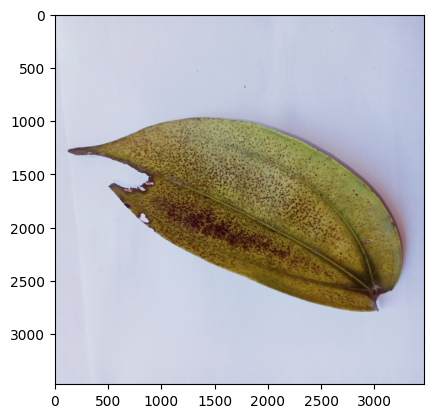

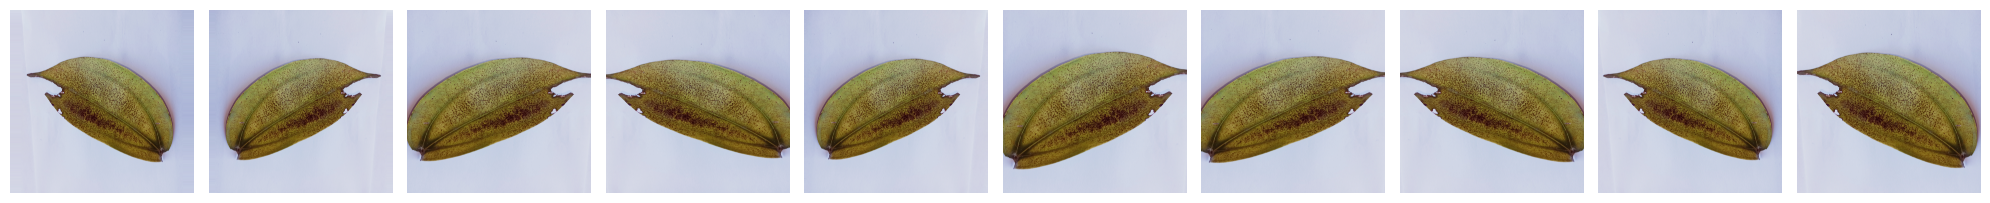

In [13]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1,10, figsize= (20,20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()  

gen = ImageDataGenerator(shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip=True)

image_path = 'img.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plot_images(aug_images)

In [53]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 420 images belonging to 3 classes.


In [55]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
test_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=False)

Found 205 images belonging to 3 classes.


In [57]:
checkpointer = keras.callbacks.ModelCheckpoint(
            filepath='CinaMiNet_Best1',
            verbose=1,
            save_best_only=True
        )

        # early stopping to prevent over training and to ensure decreasing validation loss
early_stop = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True,
            mode='min'
        )

In [58]:
hist=model.fit(training_set,
        epochs = 10,
        validation_data = valid_set) 

Epoch 1/10
47/47 [==============================] - 139s 3s/step - loss: 1.0600 - accuracy: 0.3892 - val_loss: 0.8869 - val_accuracy: 0.4214
Epoch 2/10
47/47 [==============================] - 137s 3s/step - loss: 0.4845 - accuracy: 0.8331 - val_loss: 0.3786 - val_accuracy: 0.8690
Epoch 3/10
47/47 [==============================] - 136s 3s/step - loss: 0.1148 - accuracy: 0.9689 - val_loss: 0.0416 - val_accuracy: 0.9881
Epoch 4/10
47/47 [==============================] - 136s 3s/step - loss: 0.0483 - accuracy: 0.9865 - val_loss: 0.1488 - val_accuracy: 0.9571
Epoch 5/10
47/47 [==============================] - 132s 3s/step - loss: 0.0236 - accuracy: 0.9946 - val_loss: 0.0251 - val_accuracy: 0.9905
Epoch 6/10
47/47 [==============================] - 131s 3s/step - loss: 0.0231 - accuracy: 0.9912 - val_loss: 0.0100 - val_accuracy: 0.9976
Epoch 7/10
47/47 [==============================] - 129s 3s/step - loss: 0.0481 - accuracy: 0.9865 - val_loss: 0.0444 - val_accuracy: 0.9857
Epoch 8/10
47

In [59]:
print("Done Training")

Done Training


In [60]:
# Save the entire model
model.save('CinaMiNet2.h5')

In [61]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [62]:
score = model.evaluate(test_set)
print(score)

7/7 [==============================] - 15s 2s/step - loss: 0.0139 - accuracy: 1.0000
[0.01394569966942072, 1.0]


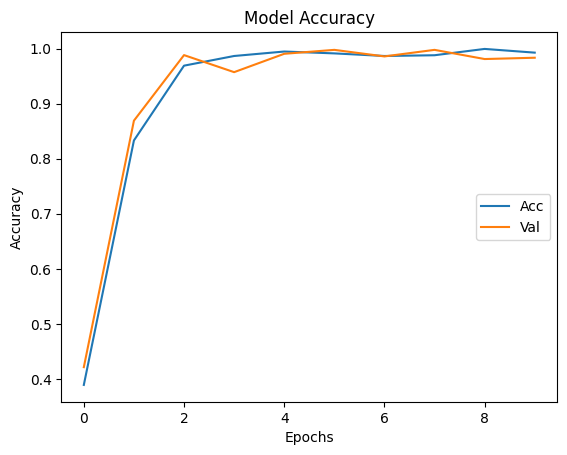

In [63]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'center right')
plt.show()

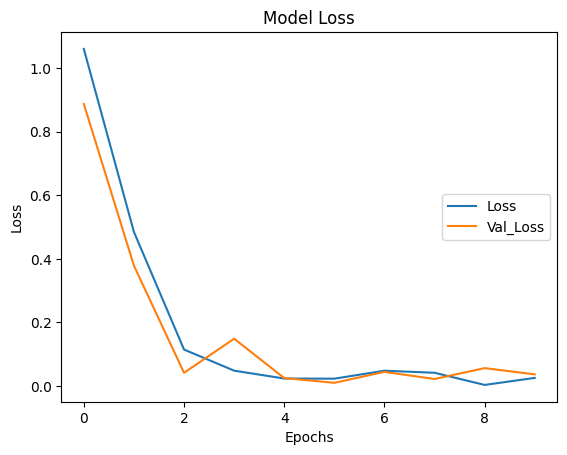

In [64]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val_Loss'], loc = 'center right')
plt.show()

In [65]:
predictions= model.predict(test_set)

7/7 [==============================] - 14s 2s/step


In [66]:
rounded_prediction = np.argmax(predictions,axis=-1)

In [67]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [68]:
cm = confusion_matrix(y_true=test_set.classes,y_pred=rounded_prediction)

In [69]:
cm_plot_labels=["mite","normal","yellow"]

Confusion matrix, without normalization
[[70  0  0]
 [ 0 70  0]
 [ 0  0 65]]


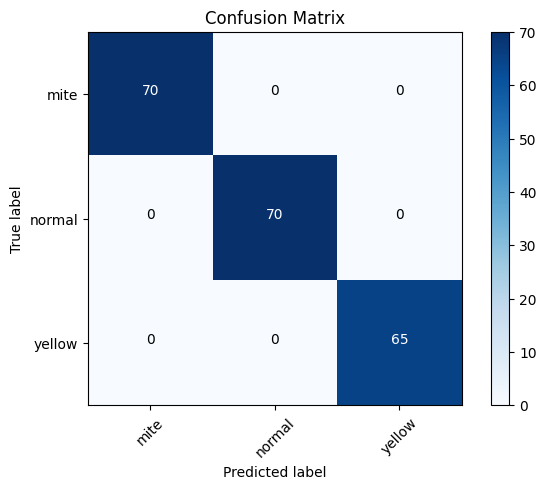

In [70]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [71]:
print(classification_report(test_set.classes,rounded_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        65

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

